In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
def summ(x,label):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=[label]).T
    return summ

In [4]:
data=pd.read_csv("C:\Users\User\Dropbox\BDA3\golf.csv")
#data=pd.read_table("C:\Users\Tomoki\Documents\Dropbox\BDA3\election.txt",sep=" ")

In [5]:
data

,distance,n,y
0,2,1443,1346
1,3,694,577
2,4,455,337
3,5,353,208
4,6,272,149
5,7,256,136
6,8,240,111
7,9,217,69
8,10,200,67
9,11,237,75


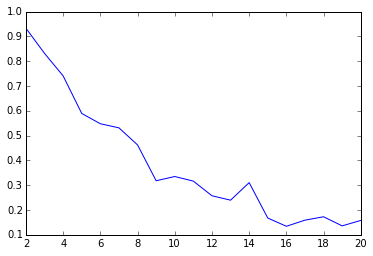

In [10]:
plt.plot(data["distance"],data["y"]/data["n"])

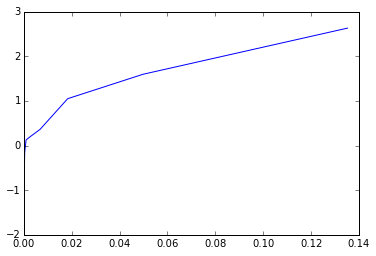

In [25]:
plt.plot(1/np.exp(data["distance"]),np.log((data["y"]/data["n"])/(1-data["y"]/data["n"])))

$logit(\theta)=A exp(-\beta_1 \times distance)$


$\theta=\frac{\exp(A exp(-\beta_1 \times distance))}{1+\exp(A exp(-\beta_1 \times distance))}$


$p(\beta_1|n,y,distance)\propto\prod_{i=1}^{19}{n_i \choose y_i}\theta^{y_i}(1-\theta)^{n_i-y_i}p(\beta_1)$

$A=100$

In [54]:
def theta(beta1,distance,A):
    return np.exp(A*np.exp(-beta1*distance))/(1+np.exp(A*np.exp(-beta1*distance)))

def posterior(n,y,distance,beta1,A):
    return np.sum(np.log(sp.stats.binom.pmf(y,n,theta(beta1,distance,A))))

In [63]:
A=100
posterior(data["n"],data["y"],data["distance"],10,A)

-1311.3716972903082

In [70]:
rang=np.arange(-10,10,0.01)
log_dens=[]
for i in range(len(rang)):
    log_dens.append(posterior(data["n"],data["y"],data["distance"],rang[i],A))

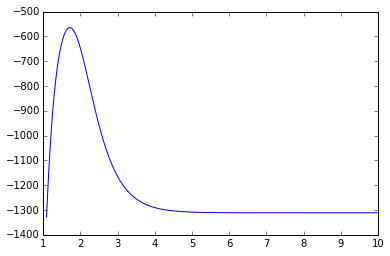

In [87]:
plt.plot(rang,log_dens)

In [115]:
def MH(data,A,ite):
    theta=[]
    old=[2.0]
    for i in range(ite):
        new_temp=old[i]+np.random.uniform(-1,1)
        if np.exp(posterior(data["n"],data["y"],data["distance"],new_temp,A)-posterior(data["n"],data["y"],data["distance"],old[i],A))>np.random.uniform():
            old.append(new_temp)
        else:
            old.append(old[i])
        if i%100==0:
            theta.append(old[i])
    return theta

In [118]:
a=MH(data,A,100000)

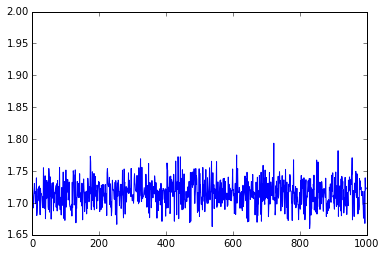

In [119]:
plt.plot(a)

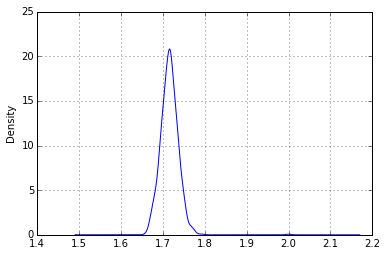

In [120]:
Series(a).plot(kind="kde")

In [123]:
y_rep=[]
for i in range(len(data)):
    y_rep.append(np.random.binomial(data["n"][i],theta(np.mean(a),data["distance"],A)[i]))

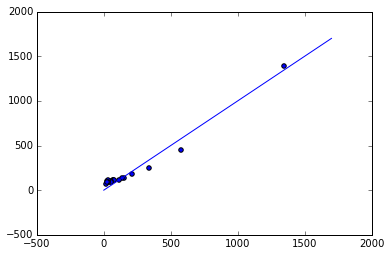

In [126]:
plt.scatter(data["y"],y_rep)
plt.plot([0,1700],[0,1700])